# IPAN - ImageJ Processing Assistant Notebook

## 03 - Working with IPAN module
**Image analysis with imported processing functions**

Multiple imageJ functions have been collected in the module ProcessingFunctions.py for a better organization and architecture of the code. In this way the process on the jupyter notebook is clear, clean and straightforward. The python helps with dealing with the multiple variable used in the analysis: filename, input, output. 
By building a module it is also possible to delete most of the repetitions that happens in the functions and to include other functionalities. One of the new functions that will be shown in this notebook is the *special.run()* that allows to run a general IMageJ macro with a pre-compiled skeleton code that takes care of the input and Output. 

Moreover, the module.py is always available in the repository and can be easily modified/duplicated/upgraded by the user to tune its own analysis.

Importantly, the loading of the multiple packages that have been used in the provious notebooks is all done in the ProcessingFunction python module. In this way it is not required to initialize imageJ in the notebook. Note that, the python module does not works alone. It is possible to properly run its functions only from the jupyeter notebooks lunched from the proper conda environment (the JPipe module is essential for this). Due to this issue, it is not possible to re-initialize imagej in the notebook and then continue using the pre-compiled python module. This is one of the main drawback of importing PyimageJ cause it limits the use in the notebook of all the excisting built-in PyimageJ functions. 

### Import the packages used from the notebook

In [1]:
import scyjava
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
#Modify memory pool
#scyjava.config.add_options('-Xmx2g') # <--- Example: set 2G memory.

In [3]:
import IPAN

---------------------------------------------------
Importing packages:

os loaded
tiffle loaded
io loaded
matplotlib loaded
numpy loaded
pathlib loaded


---------------------------------------------------
Importing ImageJ:



log4j:WARN No appenders could be found for logger (org.bushe.swing.event.EventService).
log4j:WARN Please initialize the log4j system properly.
log4j:WARN See http://logging.apache.org/log4j/1.2/faq.html#noconfig for more info.


18:35:14.372 [SciJava-6063d53e-Thread-0] DEBUG loci.formats.ClassList - Could not find loci.formats.in.SlideBook6Reader
java.lang.ClassNotFoundException: loci.formats.in.SlideBook6Reader
	at java.net.URLClassLoader.findClass(URLClassLoader.java:382)
	at java.lang.ClassLoader.loadClass(ClassLoader.java:419)
	at sun.misc.Launcher$AppClassLoader.loadClass(Launcher.java:352)
	at java.lang.ClassLoader.loadClass(ClassLoader.java:352)
	at java.lang.Class.forName0(Native Method)
	at java.lang.Class.forName(Class.java:264)
	at loci.formats.ClassList.parseLine(ClassList.java:196)
	at loci.formats.ClassList.parseFile(ClassList.java:258)
	at loci.formats.ClassList.<init>(ClassList.java:138)
	at loci.formats.ClassList.<init>(ClassList.java:122)
	at loci.formats.ImageReader.getDefaultReaderClasses(ImageReader.java:79)
	at io.scif.bf.BioFormatsFormat.cacheReaderClasses(BioFormatsFormat.java:489)
	at io.scif.bf.BioFormatsFormat.<init>(BioFormatsFormat.java:138)
	at sun.reflect.NativeConstructorAccesso

### Image analysis

#### Embedding the function from the module and create a analysis pipeline

In [4]:
def Count_nuclei(file):
    #Open the image
    IPAN.Open(INPUT_filename = file, process = True)
    
    #Process the image
    IPAN.Filter(process = True)
    IPAN.SubtractBackground(process = True)
    IPAN.Threshold(process = True)
 
    #Analyse the particles and save results
    data = IPAN.Count(process = True)
    IPAN.CloseAll()
    
    return data

In [5]:
%%capture
results = Count_nuclei("image_test4.tif");

 	Label	Area	Circ.	AR	Round	Solidity
1	image_test4_thresholded.tif	192.660	0.834	1.279	0.782	0.925
2	image_test4_thresholded.tif	214.630	0.753	1.526	0.655	0.920
3	image_test4_thresholded.tif	326.593	0.870	1.373	0.728	0.948
4	image_test4_thresholded.tif	190.970	0.843	1.471	0.680	0.928
5	image_test4_thresholded.tif	215.475	0.846	1.498	0.667	0.943
6	image_test4_thresholded.tif	400.531	0.692	1.981	0.505	0.896
7	image_test4_thresholded.tif	176.183	0.897	1.188	0.842	0.943
8	image_test4_thresholded.tif	368.843	0.876	1.148	0.871	0.951
9	image_test4_thresholded.tif	212.095	0.863	1.381	0.724	0.946
10	image_test4_thresholded.tif	199.420	0.827	1.447	0.691	0.937
11	image_test4_thresholded.tif	200.688	0.923	1.147	0.872	0.951
12	image_test4_thresholded.tif	182.520	0.705	2.014	0.496	0.914
13	image_test4_thresholded.tif	195.618	0.746	2.056	0.486	0.920
14	image_test4_thresholded.tif	169.000	0.913	1.127	0.887	0.949
15	image_test4_thresholded.tif	173.225	0.890	1.103	0.907	0.926
16	image_test4_thresholded.

In [6]:
import pandas as pd
Data = pd.read_csv(results, header = 0, sep=',', encoding='latin-1', index_col=0).drop("Label", axis = 1)
Data

,Area,Circ.,AR,Round,Solidity
,,,,,
1,192.660,0.834,1.279,0.782,0.925
2,214.630,0.753,1.526,0.655,0.920
3,326.593,0.870,1.373,0.728,0.948
4,190.970,0.843,1.471,0.680,0.928
5,215.475,0.846,1.498,0.667,0.943
...,...,...,...,...,...
88,379.406,0.870,1.406,0.711,0.948
89,198.575,0.842,1.572,0.636,0.933
90,376.448,0.734,1.487,0.672,0.914


### Working with the functions from the module

In [7]:
from scyjava import jimport
WindowManager = jimport('ij.WindowManager')

In [8]:
print("Are all windows closed?:\t", WindowManager.closeAllWindows())

Are all windows closed?:	 True


In [9]:
IPAN.Profile()


        There are no images open.

        To use the Profile() function, firstly call the Open() function


The output directory already exist.




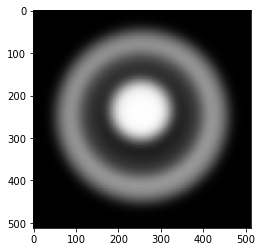


IMAGE ⬆︎

Image path: /Users/nicolascristini/Desktop/Circles.tif
[INFO] script:macro.ijm = [[in, out], [/Users/nicolascristini/Desktop//Circles.tif, /Users/nicolascristini/Desktop/Results/Circles_profile.png]]
---------------------------------------------------


The images are imported from:  /Users/nicolascristini/Desktop/
INPUT_filename: Circles.tif


The results are exported in:  /Users/nicolascristini/Desktop/Results
OUTPUT_filename: Circles_profile.png


---------------------------------------------------


[java.lang.Enum.toString] [INFO] script:macro.ijm = [[in, out], [/Users/nicolascristini/Desktop//Circles.tif, /Users/nicolascristini/Desktop/Results/Circles_profile.png]]


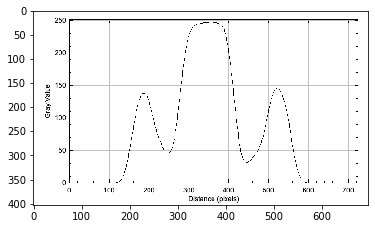

IMAGE PROFILE ⬆︎


In [10]:
#We can alwasys use the Profile function on images of our choice but firsly we must open it with *Open()*
IPAN.Open(path_in = "/Users/nicolascristini/Desktop/Circles.tif")
IPAN.Profile(path_out = "/Users/nicolascristini/Desktop/Results")

In [11]:
IPAN.CloseAll()


All windows are closed


### In the IPAN module there are other functions that can be used for a  visualisation of the image under analysis

The Make3D() function compute a 3D map of the image pixel intensity. It does it without the use of imageJ. It can be usefull to understand how the computer see the image and how the processing steps impact on it.


The computer see the image as a matrix of values.
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

We see the image as a change in light intensity but it can also be as a 3D representation of the pixel intensity:



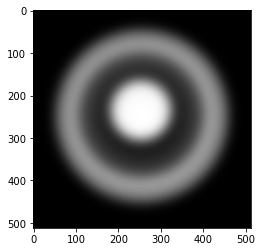

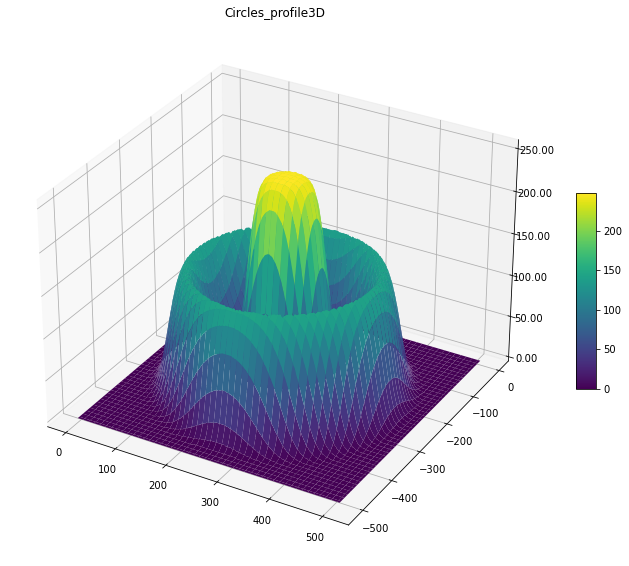

In [12]:
IPAN.Profile3D("/Users/nicolascristini/Desktop/Circles.tif")

### Special MacroRUN function


The *IPAN.MacroRun()* function automatically use a set of variables to define the input/output. The following string exmplain how the variables are obtained from the arguments required in input from the function. <br><br> Below we can see an example:

In [13]:
example_input_test = """
//DEFINE IO
#@ String dir_in
#@ String dir_out
#@ String filename_in
#@ String filename_out
"""

In [14]:
#example filepath
filepath = "/Users/nicolascristini/Desktop/Circles.tif"

In [15]:
#example of the generated IO arguments
dir_in = "/Users/nicolascristini/Desktop/"
dir_out = "/Users/nicolascristini/Desktop/Results"
filename_in = "Circles.tif"
filename_out = "Circles_results.tif"

Let's now run an example by selecting a simple macro that add some noise to the image.

In [16]:
macro_noise = """
file_path_in = dir_in + filename_in;

open(file_path_in);
run("Add Noise");

file_path_out = dir_out + filename_out;
saveAs("Tiff", file_path_out);
"""

Use the *AddMacro()* function to add the macro test to the macros library

In [17]:
IPAN.AddMacro(title = "noise", text= macro_noise)

I can always call the macro to check it

In [18]:
#Call the test of the macro
IPAN.macros["noise"]

'\nfile_path_in = dir_in + filename_in;\n\nopen(file_path_in);\nrun("Add Noise");\n\nfile_path_out = dir_out + filename_out;\nsaveAs("Tiff", file_path_out);\n'

Use the *IPAN.MacroRun()* function by giving as arguments the path of the original file and the title of the macro I want to run.

In [19]:
IPAN.MacroRun(filepath= "/Users/nicolascristini/Desktop/Circles.tif", macro_title= "noise")

The output directory already exist.


The results are saved in:

 /Users/nicolascristini/Desktop/Results/Circles_result.png


Let's now chek the result by display the image saved as the output file. 

ORIGINAL IMAGE:


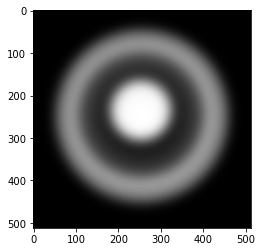

In [20]:
img_original = mpimg.imread("/Users/nicolascristini/Desktop/Circles.tif")
plt.imshow(img_original, cmap = "gray")
print("ORIGINAL IMAGE:")
plt.show()

NOISY IMAGE:


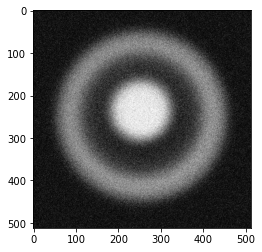

In [21]:
img_noise = mpimg.imread("/Users/nicolascristini/Desktop/Results/Circles_result.tif")
plt.imshow(img_noise, cmap = "gray")
print("NOISY IMAGE:")
plt.show()

With the example above I demostrated that it is possible to run a macro by directly using the function imported from the module. This is required because, since ImageJ has been imported in the module, it cannot be reimported from the notebook and allow us to run any type of macro we want during the analytical process.
Moreover, the funcrion *AddMacro()* enable to create a sort of library that contains all the pre-compiled macros that can be required in the workflow. It is important that the macro_text respects the name of the IO variables as shown in the example. <br> In the following notebook I will use the processing functions to run a Nuclei Count in different cases. 04-Nuclei Count.ipynb

***
***